In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [82]:
# Fake news dataset
fakeNews_df = pd.read_csv('./dataset/fake_real_news/Fake.csv')
fakeNews_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [83]:
# Real news dataset
trueNews_df = pd.read_csv('./dataset/fake_real_news/True.csv')
trueNews_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Preprocessing and Data visualization

In [84]:
# Add true and fake label to dataframes
fakeNews_df['label'] = 0
trueNews_df['label'] = 1

# Concat the two dataframes
news_df = pd.concat([fakeNews_df, trueNews_df])
news_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [85]:
# Check for the NaN values
news_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

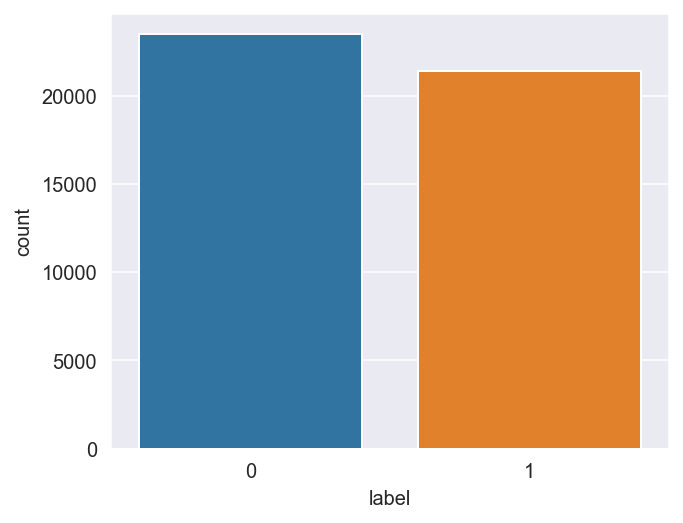

In [86]:
# Display the number of fake and the number of true news
plt.figure(figsize=(5, 4))

sns.countplot(news_df.label)

plt.show()

In [87]:
# Display the total number of rows for each column
news_df.count()

title      44898
text       44898
subject    44898
date       44898
label      44898
dtype: int64

In [88]:
news_df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

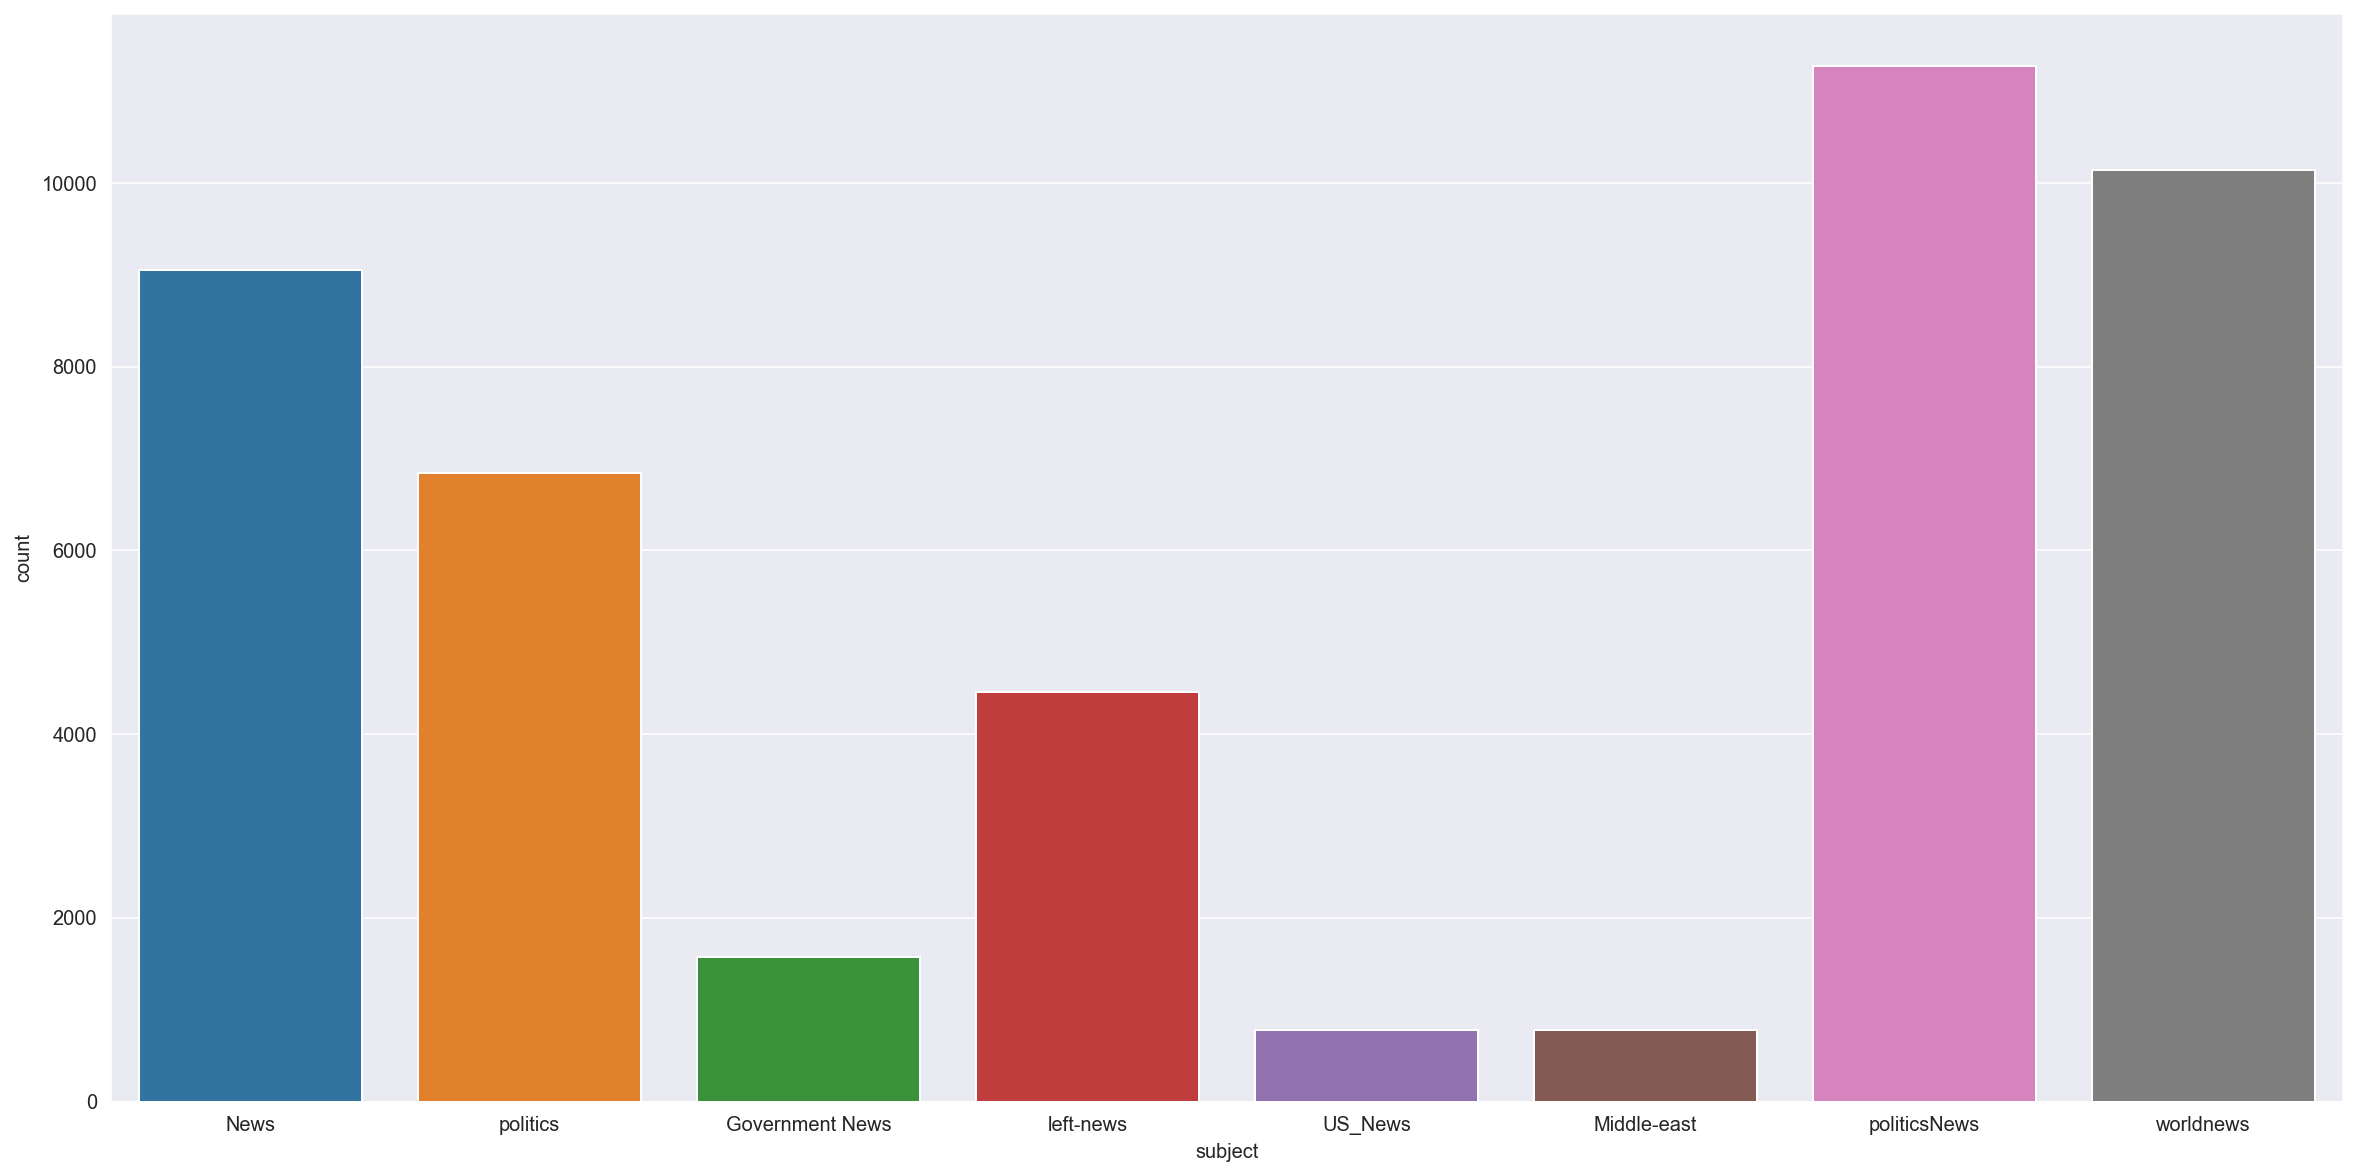

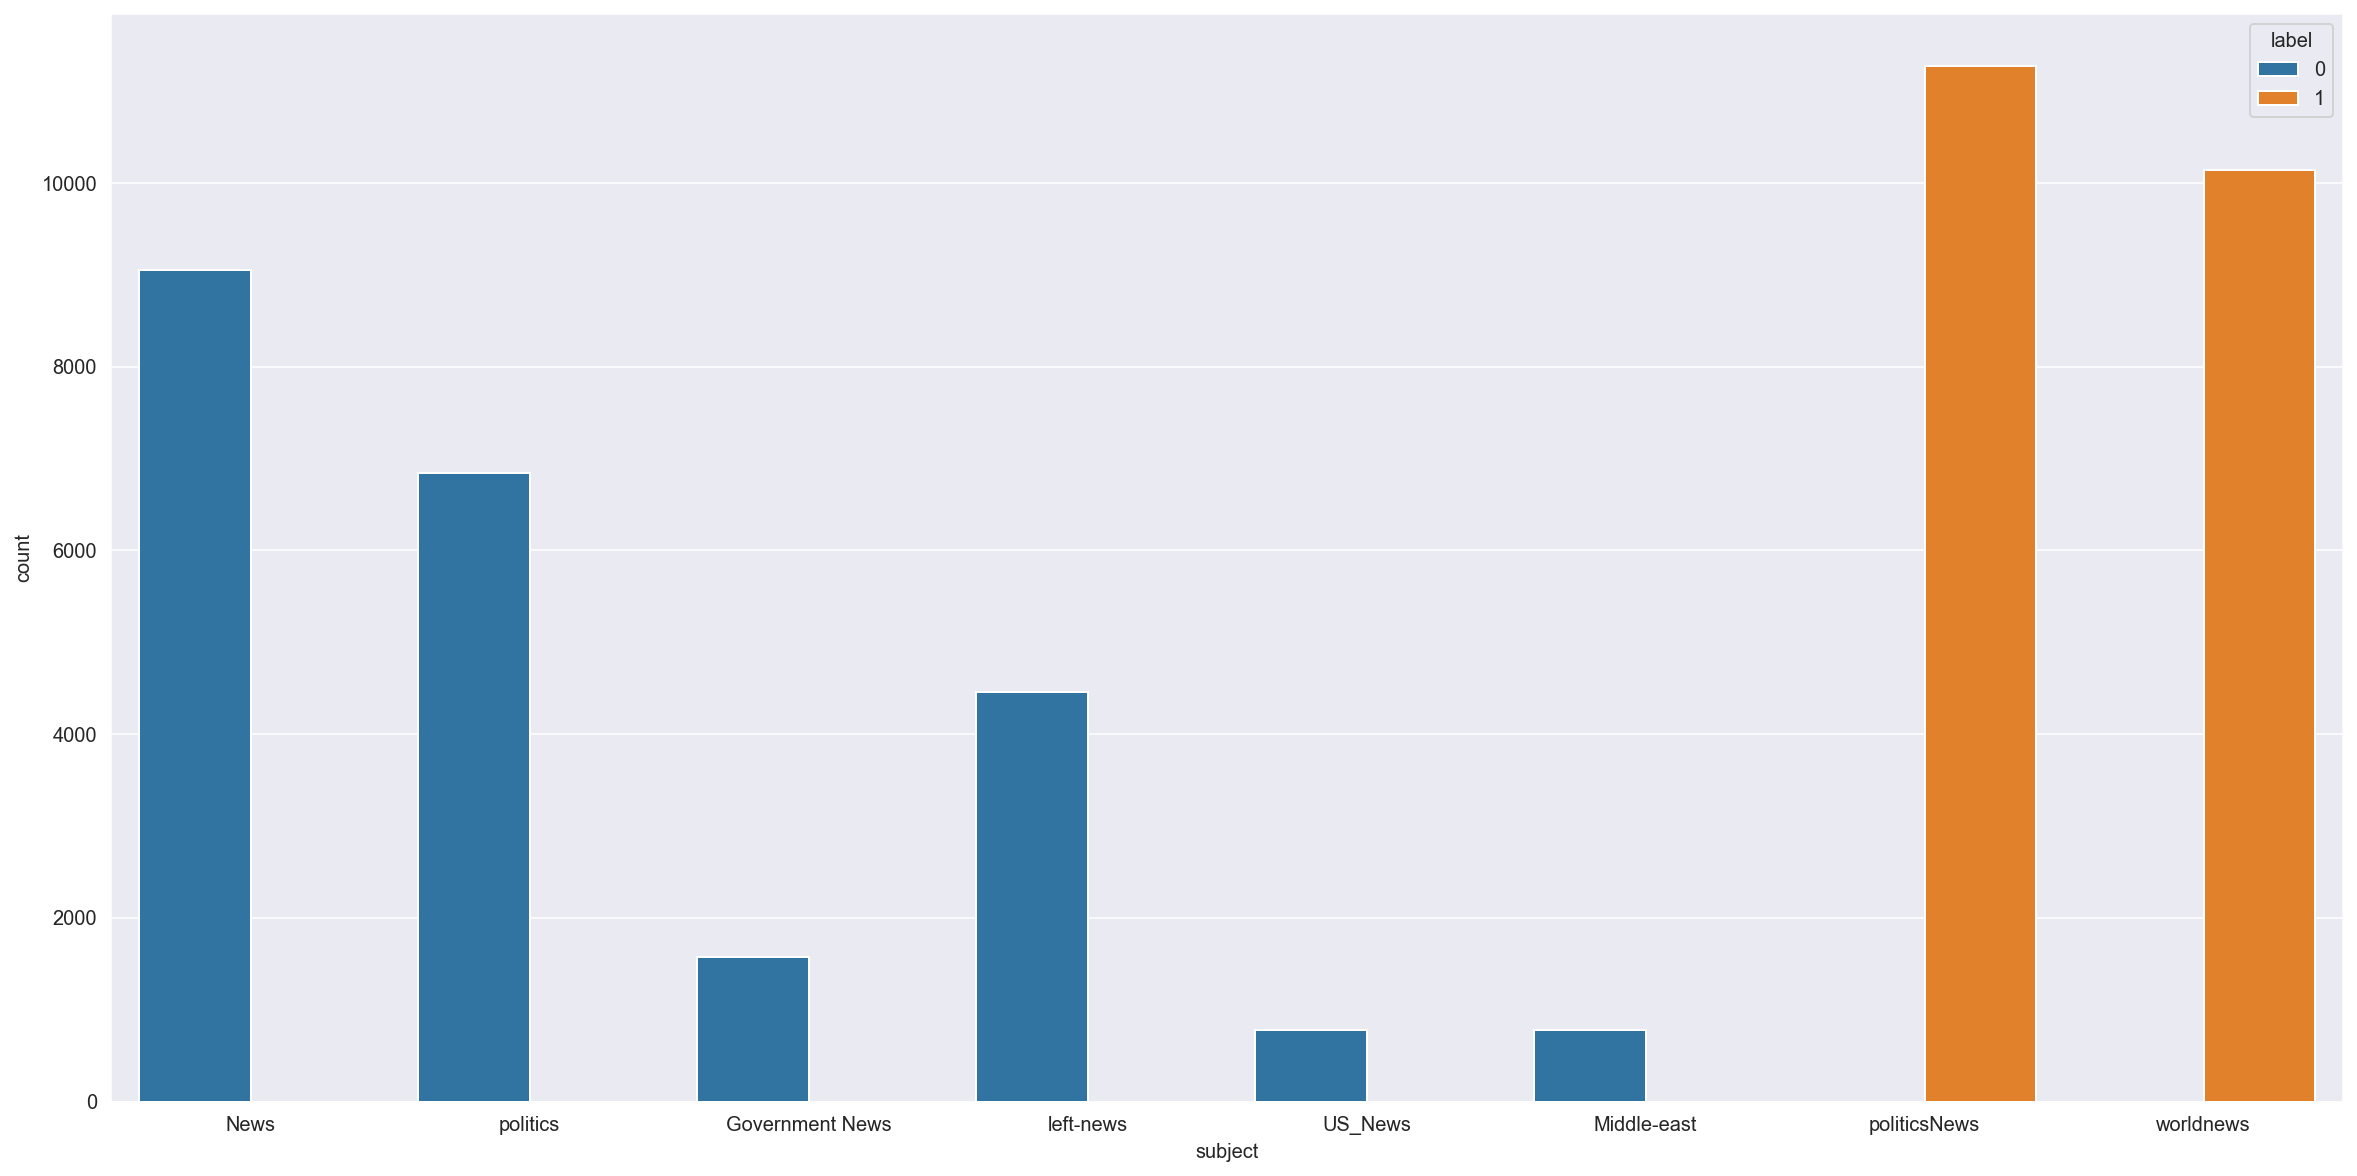

In [89]:
# Visualize the category of the subjects

plt.figure(figsize=(30, 10))
sns.countplot(x="subject", data=news_df)
plt.show()


plt.figure(figsize=(30, 10))
sns.countplot(x="subject", data=news_df, hue='label')
plt.show()

In [93]:
# Delete subject and date
del news_df['subject']
del news_df['date']
news_df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


### Analysis of the texts

In [120]:
import string

# Remove stopwords
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)

    final_text = []

    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())

    return ' '.join(final_text) 

news_df.text = news_df.text.apply(remove_stopwords)

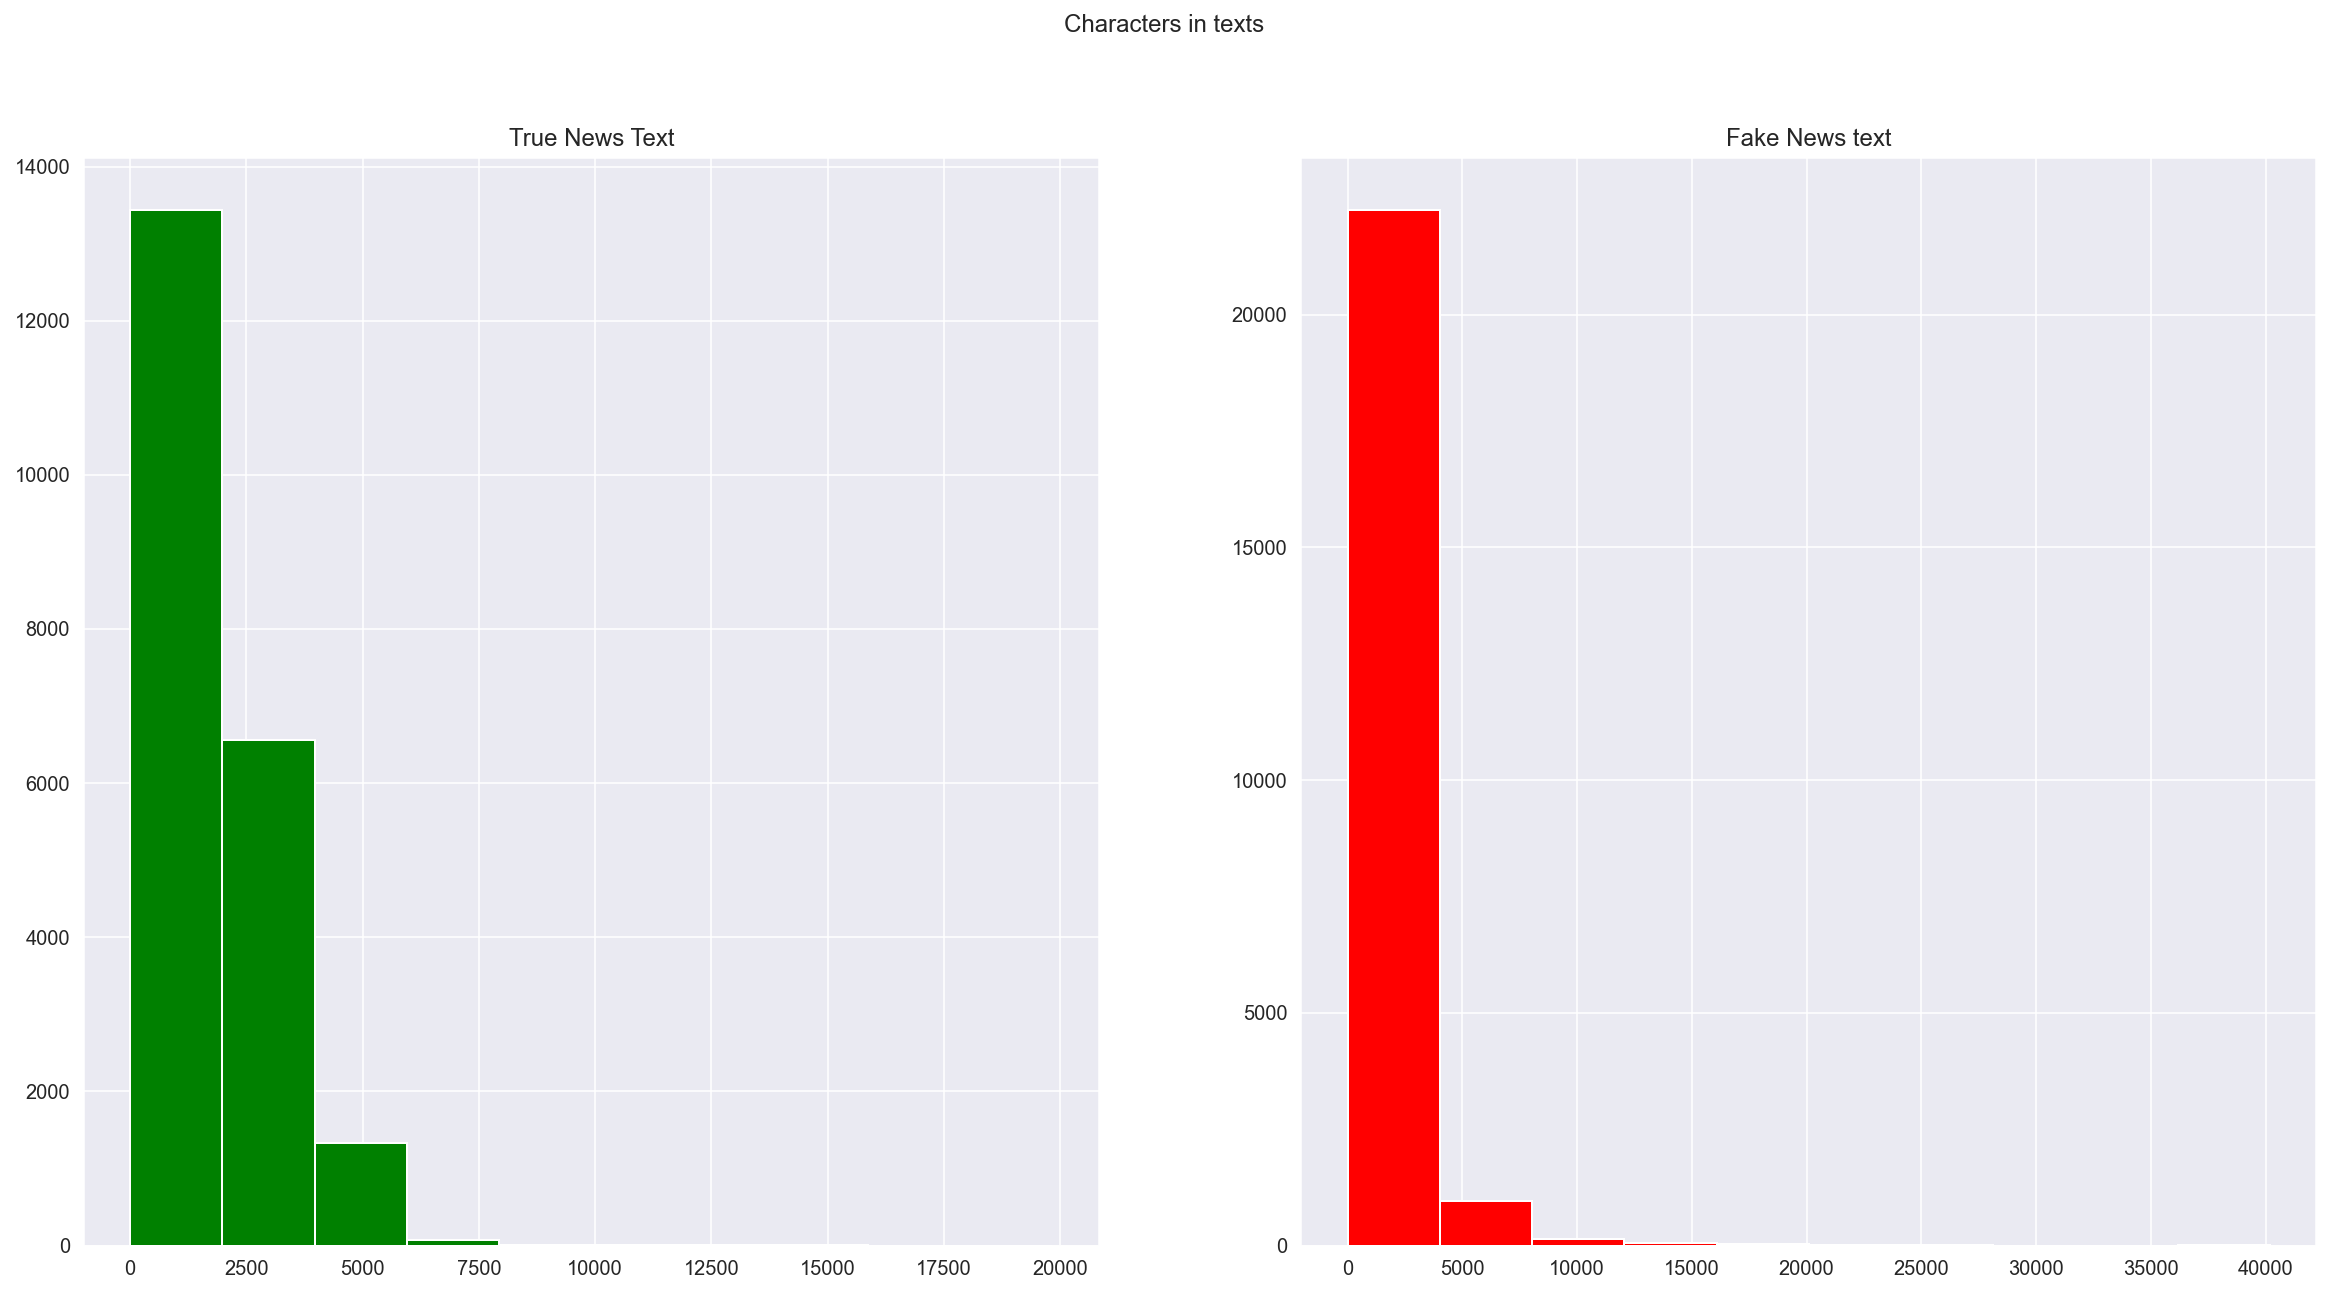

In [124]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

text_len = news_df[news_df['label'] == 1]['text'].str.len()
ax1.hist(text_len, color='green')
ax1.set_title('True News Text')

text_len=news_df[news_df['label'] == 0]['text'].str.len()
ax2.hist(text_len, color='red')
ax2.set_title('Fake News text')

fig.suptitle('Characters in texts')
plt.show()

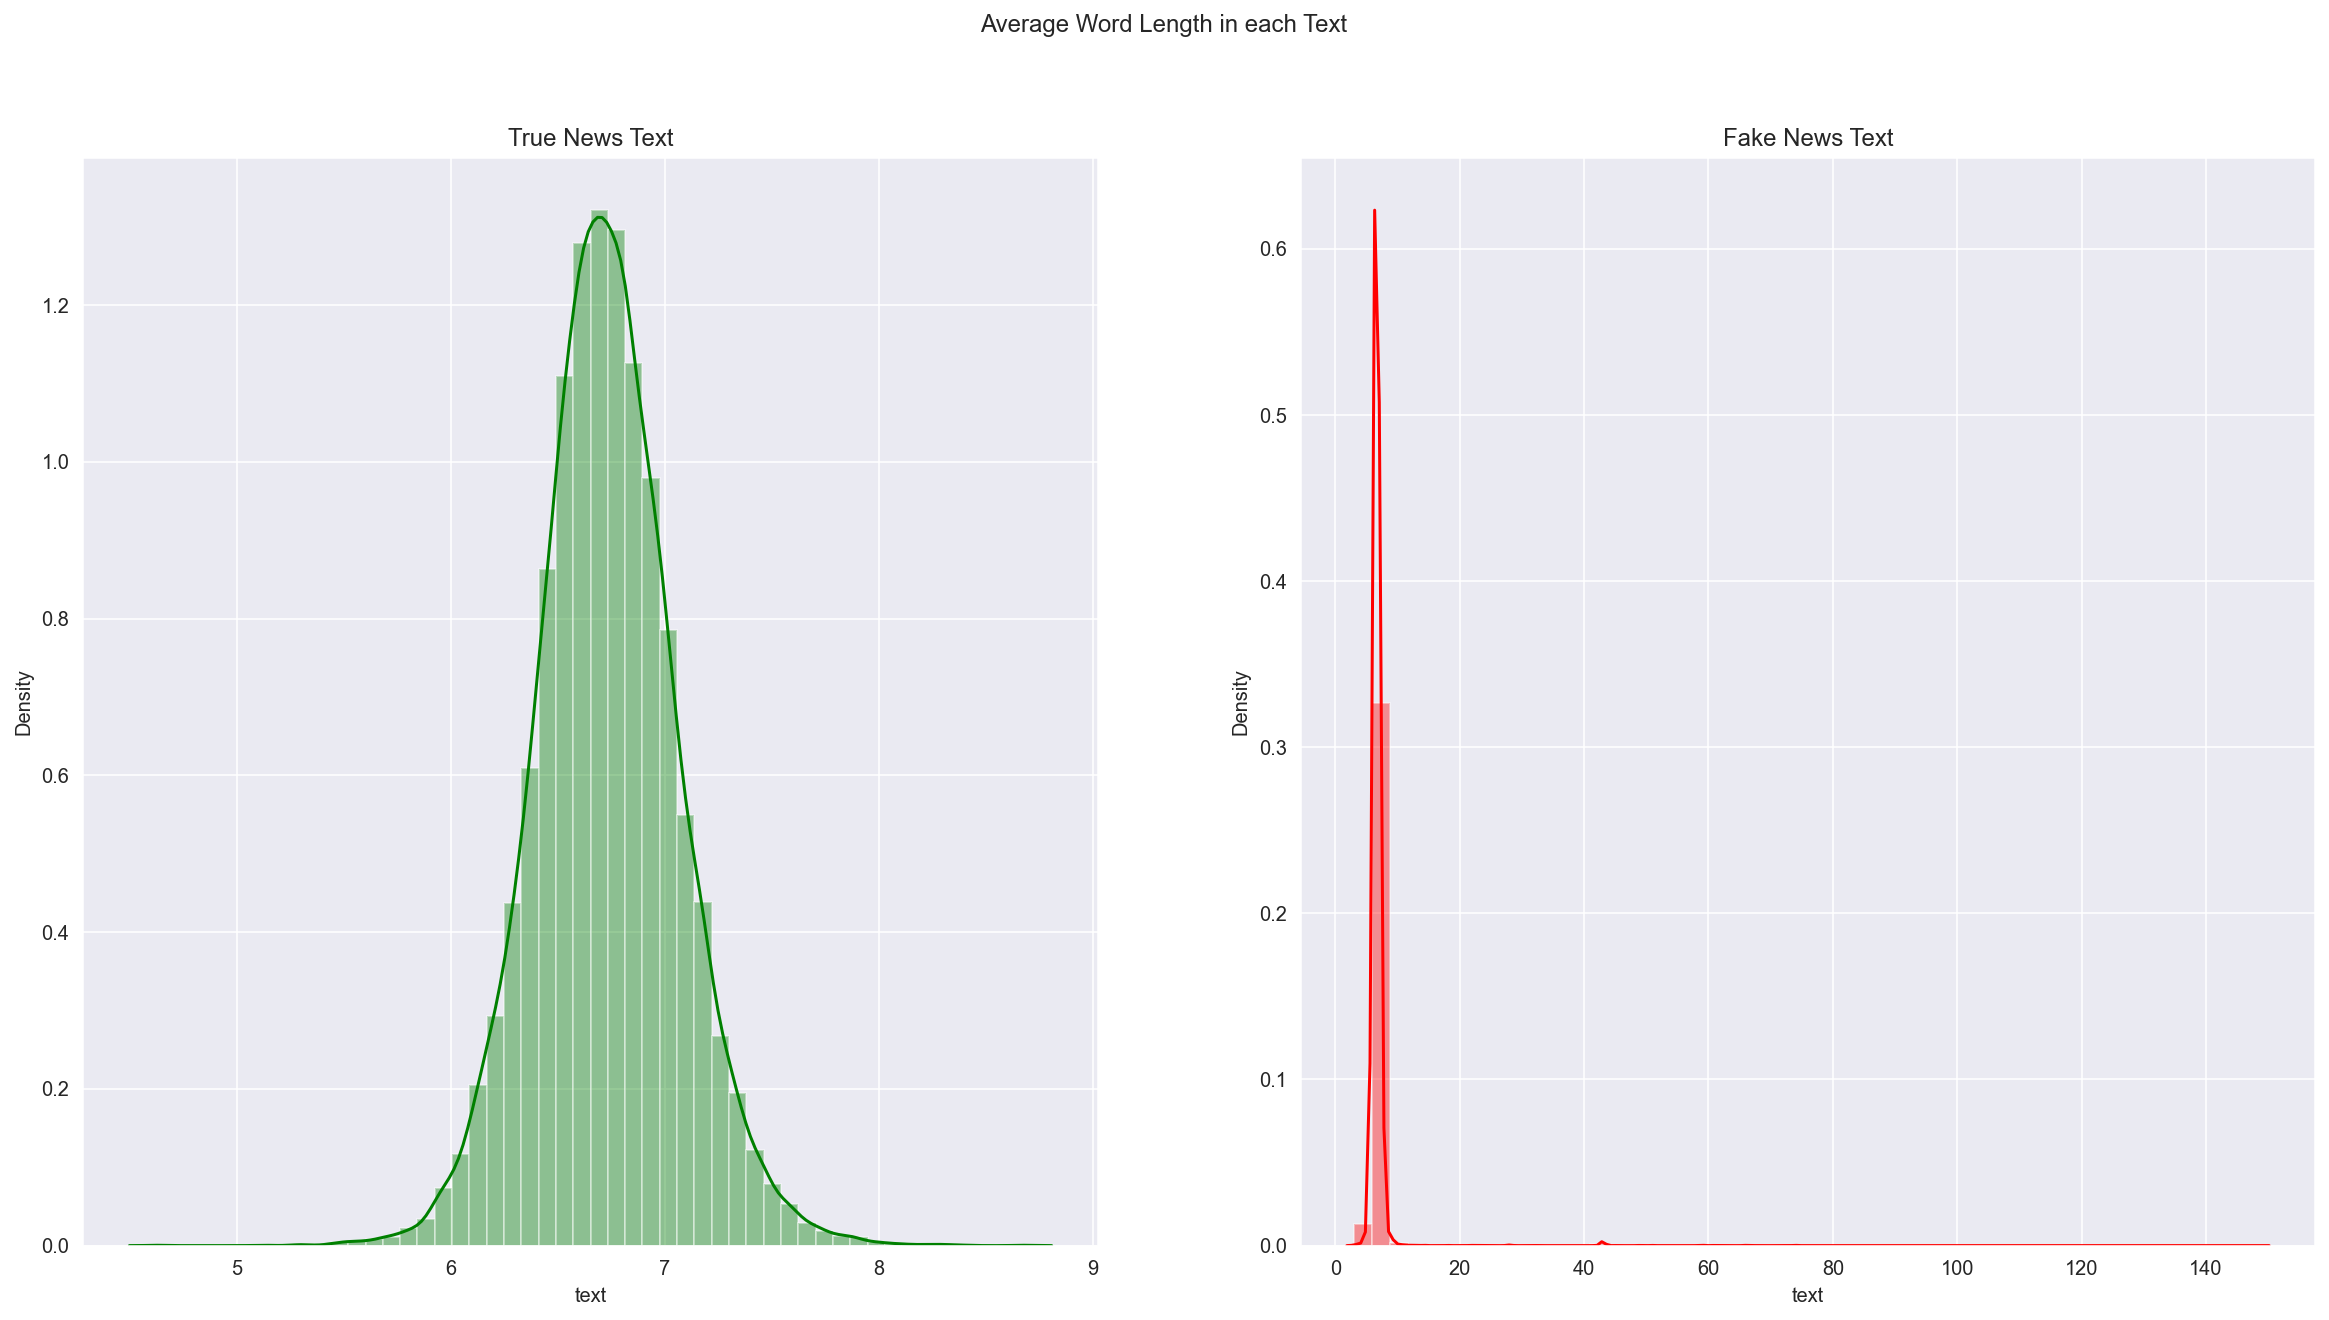

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

word = news_df[news_df['label'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='green')
ax1.set_title('True News Text')

word = news_df[news_df['label'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='red')
ax2.set_title('Fake News Text')

fig.suptitle('Average Word Length in each Text')
plt.show()

In [132]:
# Most common words in texts
from collections import Counter

words = []
corpus = news_df.text

for text in corpus:
    for word in text.split():
        words.append(word.strip())


counter = Counter(words)
most_common = counter.most_common(10)
dict(most_common)

{'Trump': 101305,
 'said': 93137,
 'would': 54354,
 'U.S.': 46126,
 'people': 32968,
 'President': 32303,
 'also': 30314,
 'one': 29296,
 'Donald': 27014,
 'said.': 26190}

### Analysis of Titles

In [125]:
import string

# Remove stopwords
def remove_stopwords(title):
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)

    final_title = []

    for i in title.split():
        if i.strip().lower() not in stop:
            final_title.append(i.strip())

    return ' '.join(final_title) 

news_df.title = news_df.title.apply(remove_stopwords)

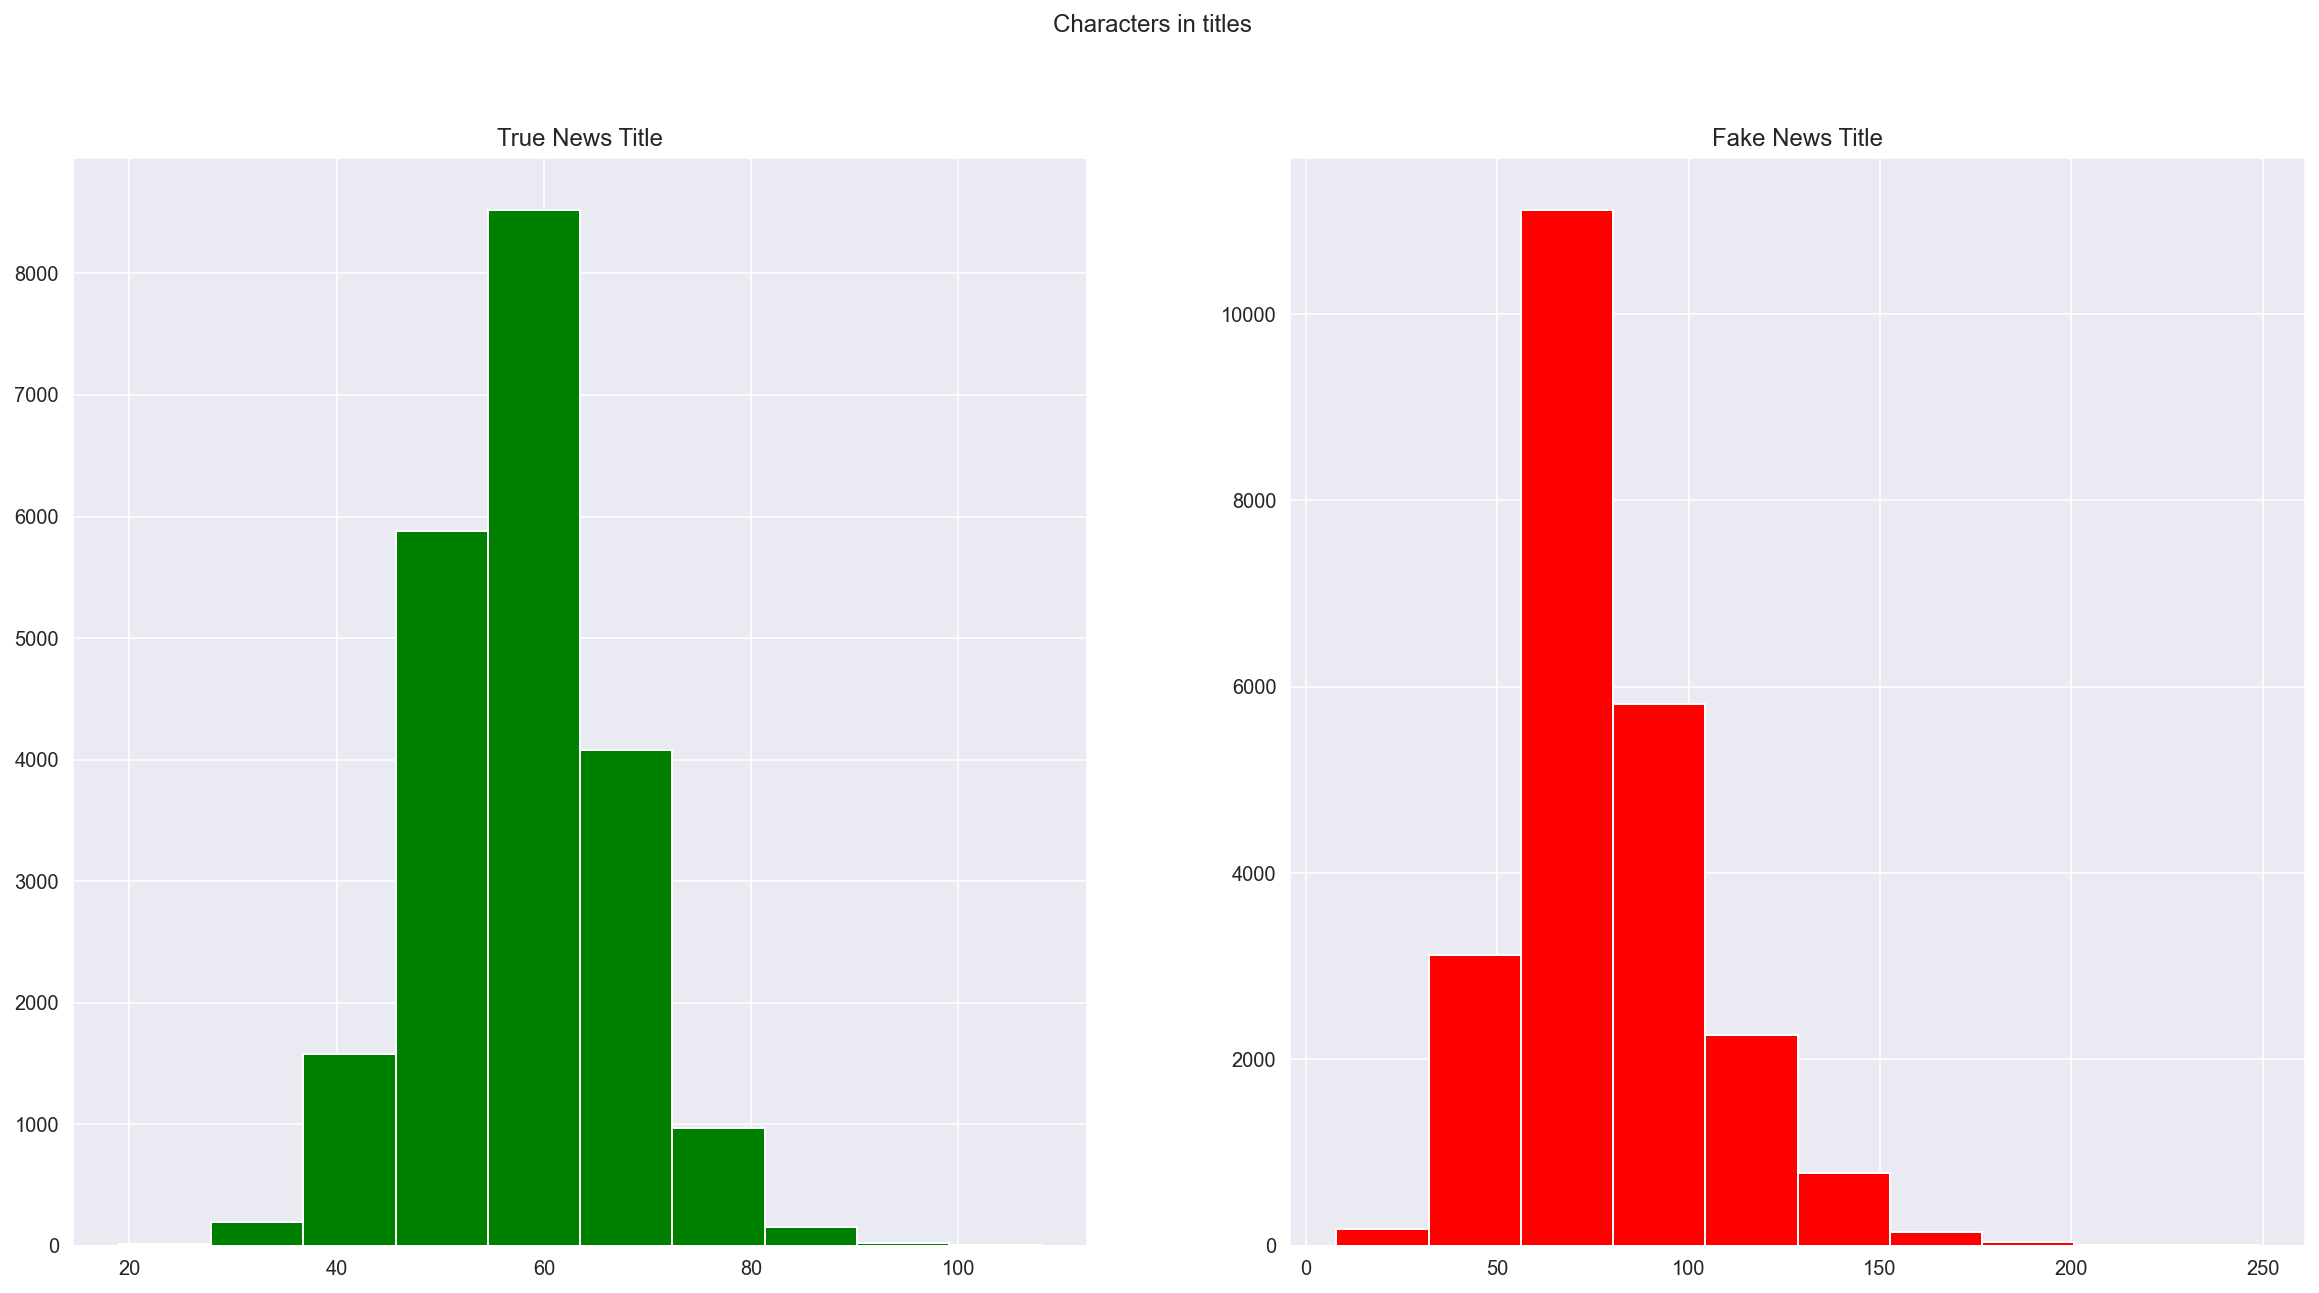

In [126]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

title_len = news_df[news_df['label'] == 1]['title'].str.len()
ax1.hist(title_len, color='green')
ax1.set_title('True News Title')

title_len=news_df[news_df['label'] == 0]['title'].str.len()
ax2.hist(title_len, color='red')
ax2.set_title('Fake News Title')

fig.suptitle('Characters in titles')
plt.show()

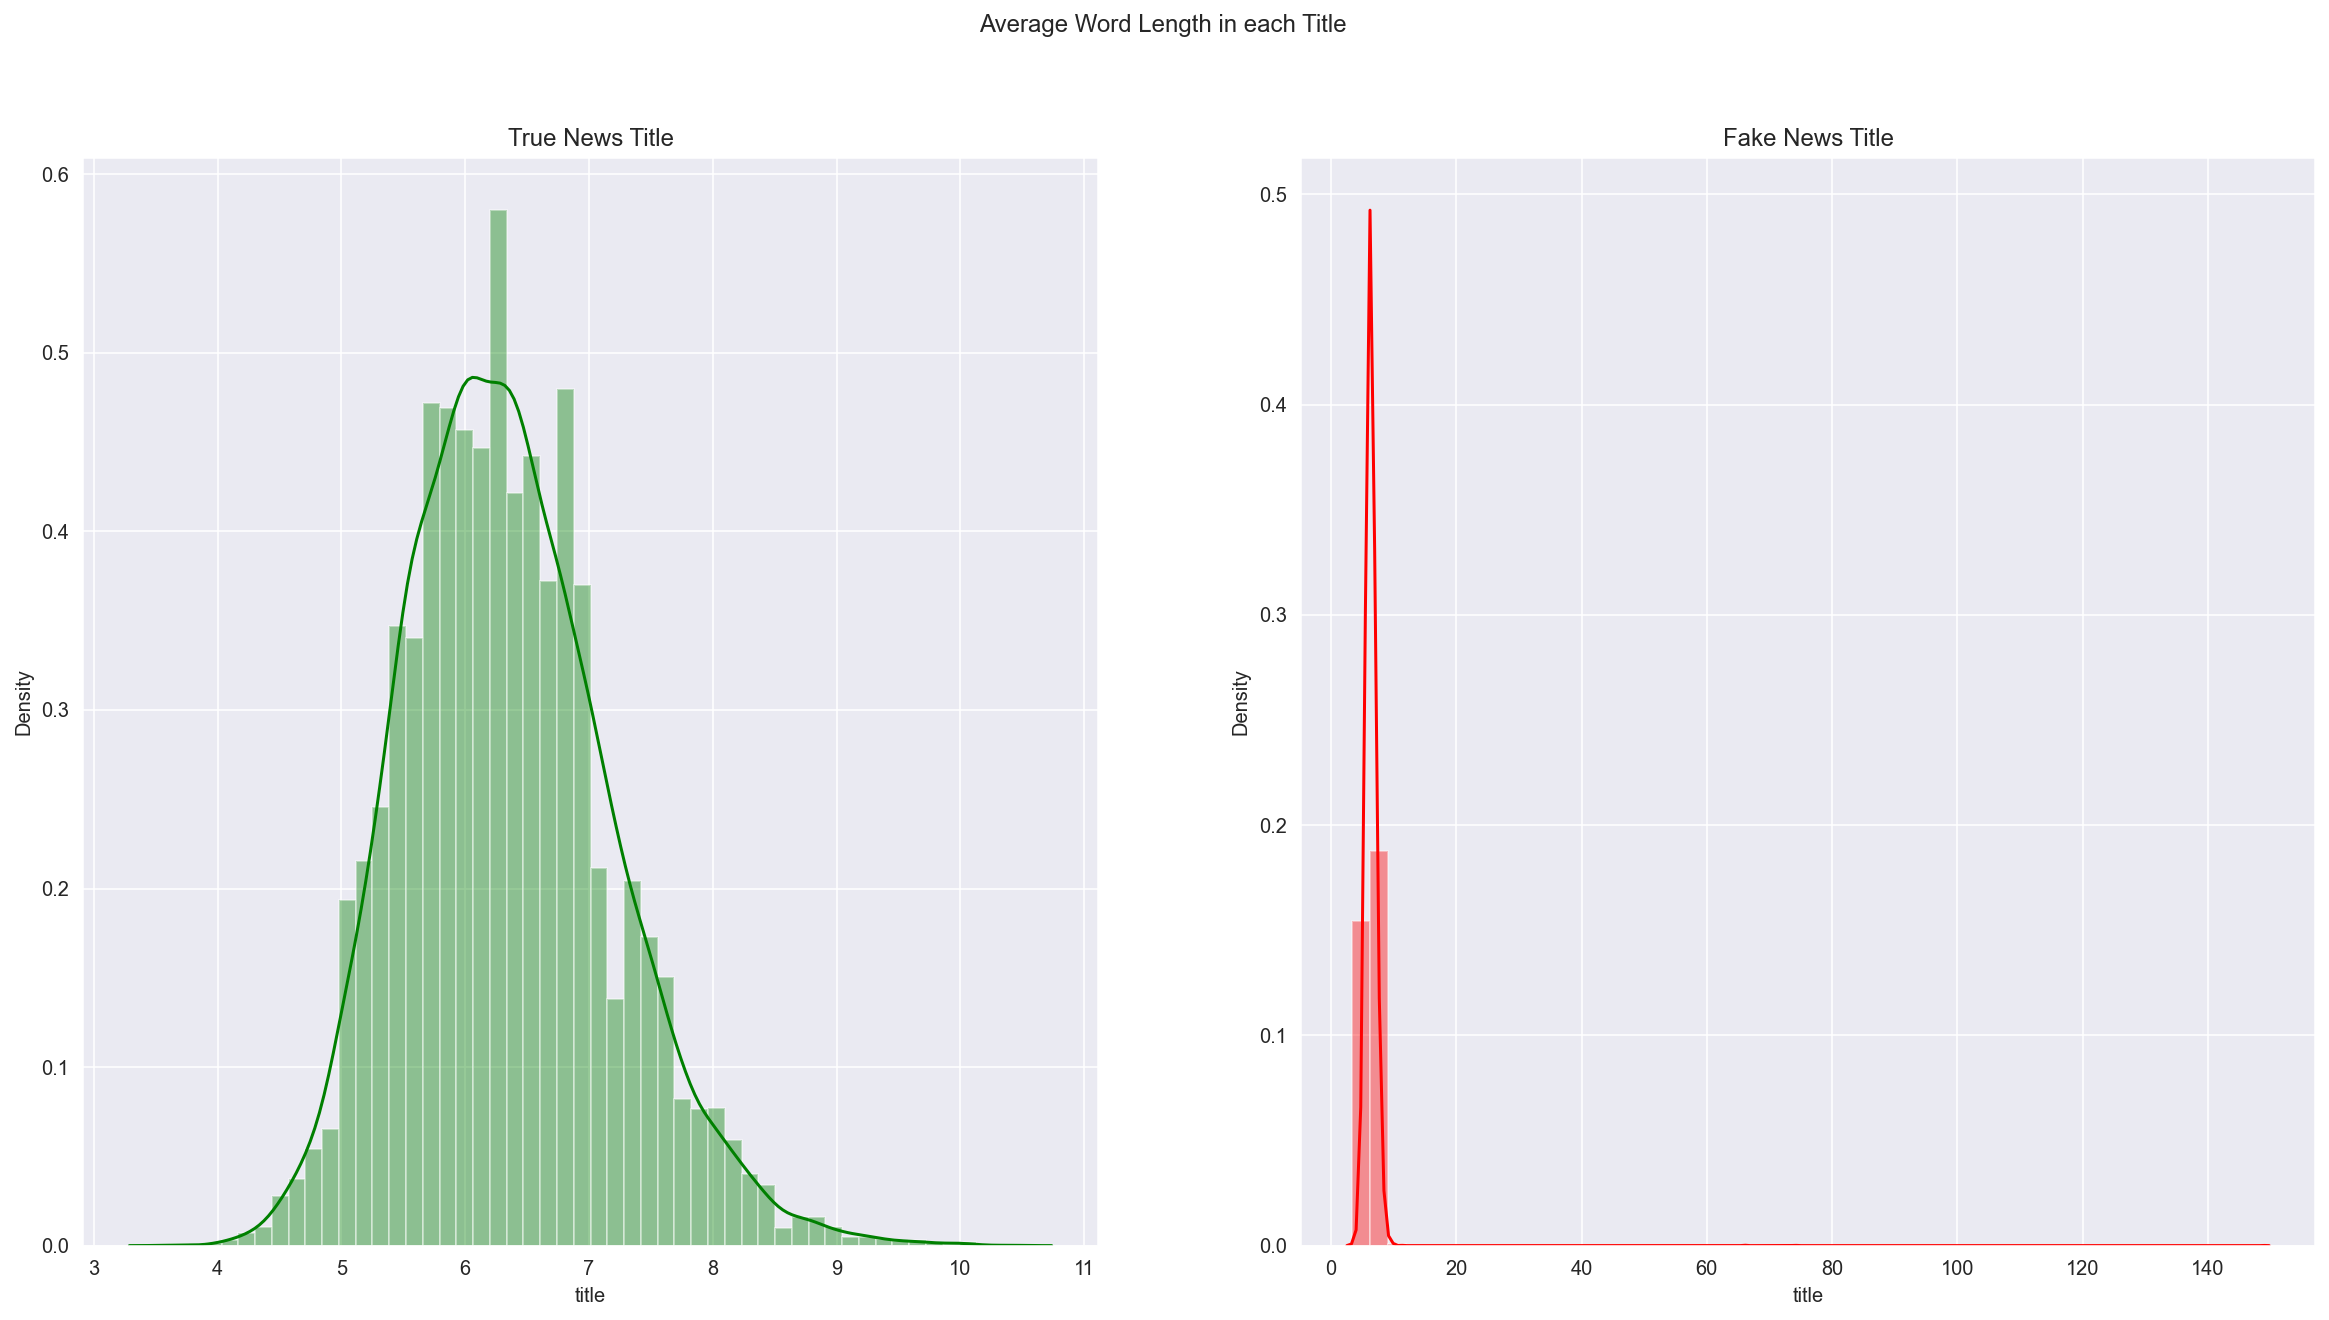

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

word = news_df[news_df['label'] == 1]['title'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='green')
ax1.set_title('True News Title')

word = news_df[news_df['label'] == 0]['title'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='red')
ax2.set_title('Fake News Title')

fig.suptitle('Average Word Length in each Title')
plt.show()

In [131]:
# Most common words in titles
from collections import Counter

words = []
corpus = news_df.title

for title in corpus:
    for word in text.split():
        words.append(word.strip())


counter = Counter(words)
most_common = counter.most_common(10)
dict(most_common)

{'Indonesia': 134694,
 'Russia': 134694,
 'Indonesian': 134694,
 'said': 134694,
 'fighter': 89796,
 'worth': 89796,
 'cash': 89796,
 'two': 89796,
 'Southeast': 89796,
 'million': 89796}

In [146]:
# Most common words in titles (true vs fake)
from collections import Counter

def count_words(boolean):
    words = []
    corpus = news_df[news_df['label'] == boolean]['title']

    for title in corpus:
        for word in text.split():
            words.append(word.strip())

    counter = Counter(words)
    most_common = counter.most_common(10)
    return most_common

most_common_true = dict(count_words(1))
most_common_fake = dict(count_words(0))

{'Indonesia': 64251,
 'Russia': 64251,
 'Indonesian': 64251,
 'said': 64251,
 'fighter': 42834,
 'worth': 42834,
 'cash': 42834,
 'two': 42834,
 'Southeast': 42834,
 'million': 42834}

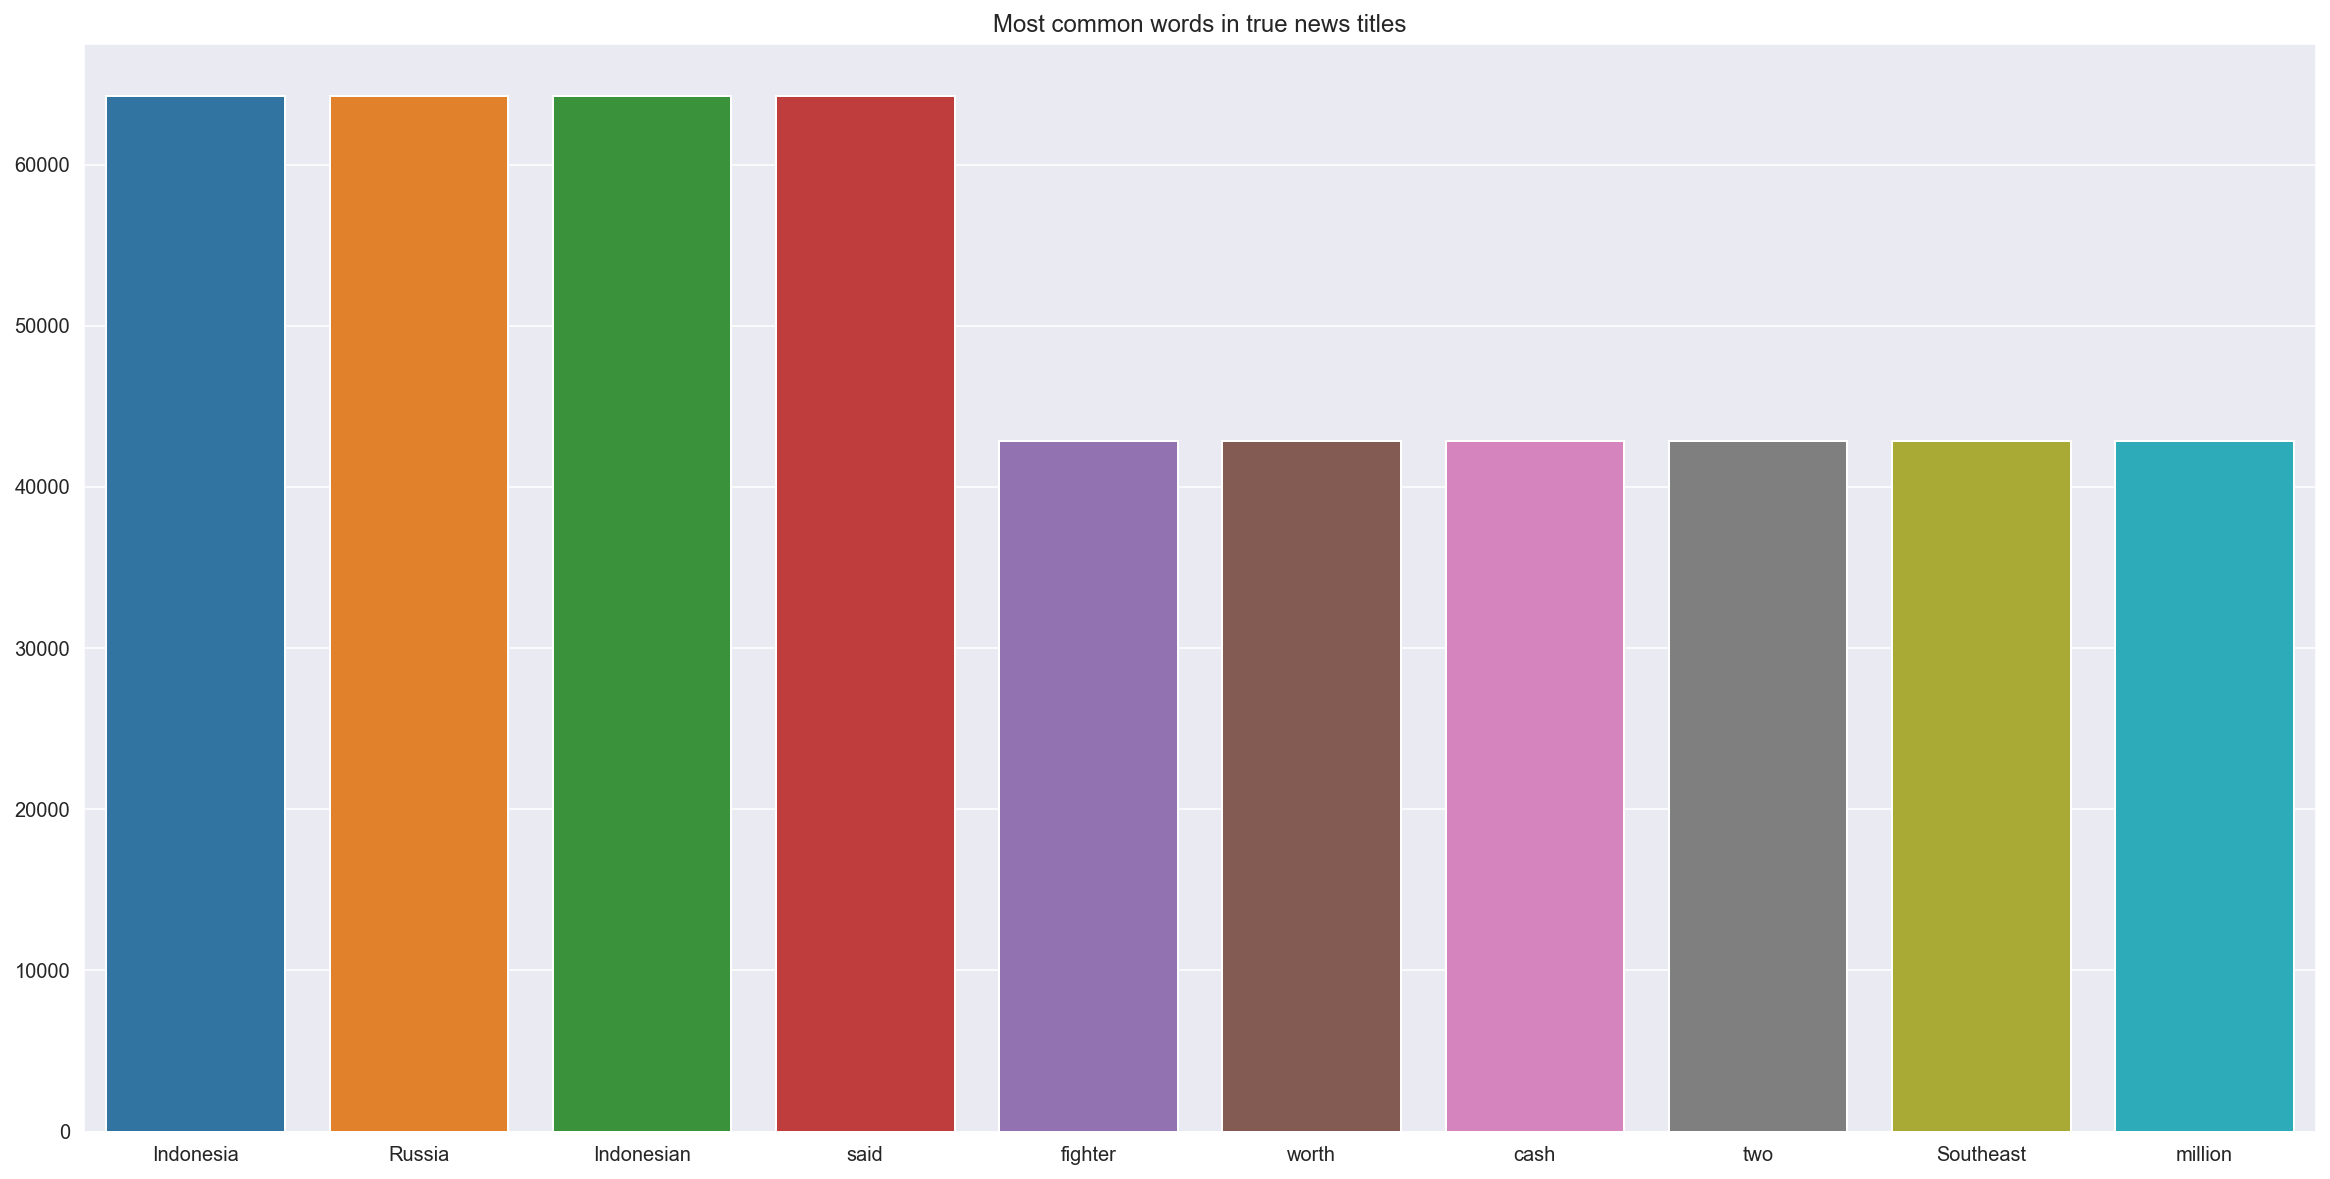

In [152]:
most_common_true_serie = pd.Series(most_common_true.values(), index=most_common_true.keys())

plt.figure(figsize=(30,10))
plt.title('Most common words in true news titles')
sns.barplot(x=most_common_true_serie.index, y=most_common_true_serie)
plt.show()

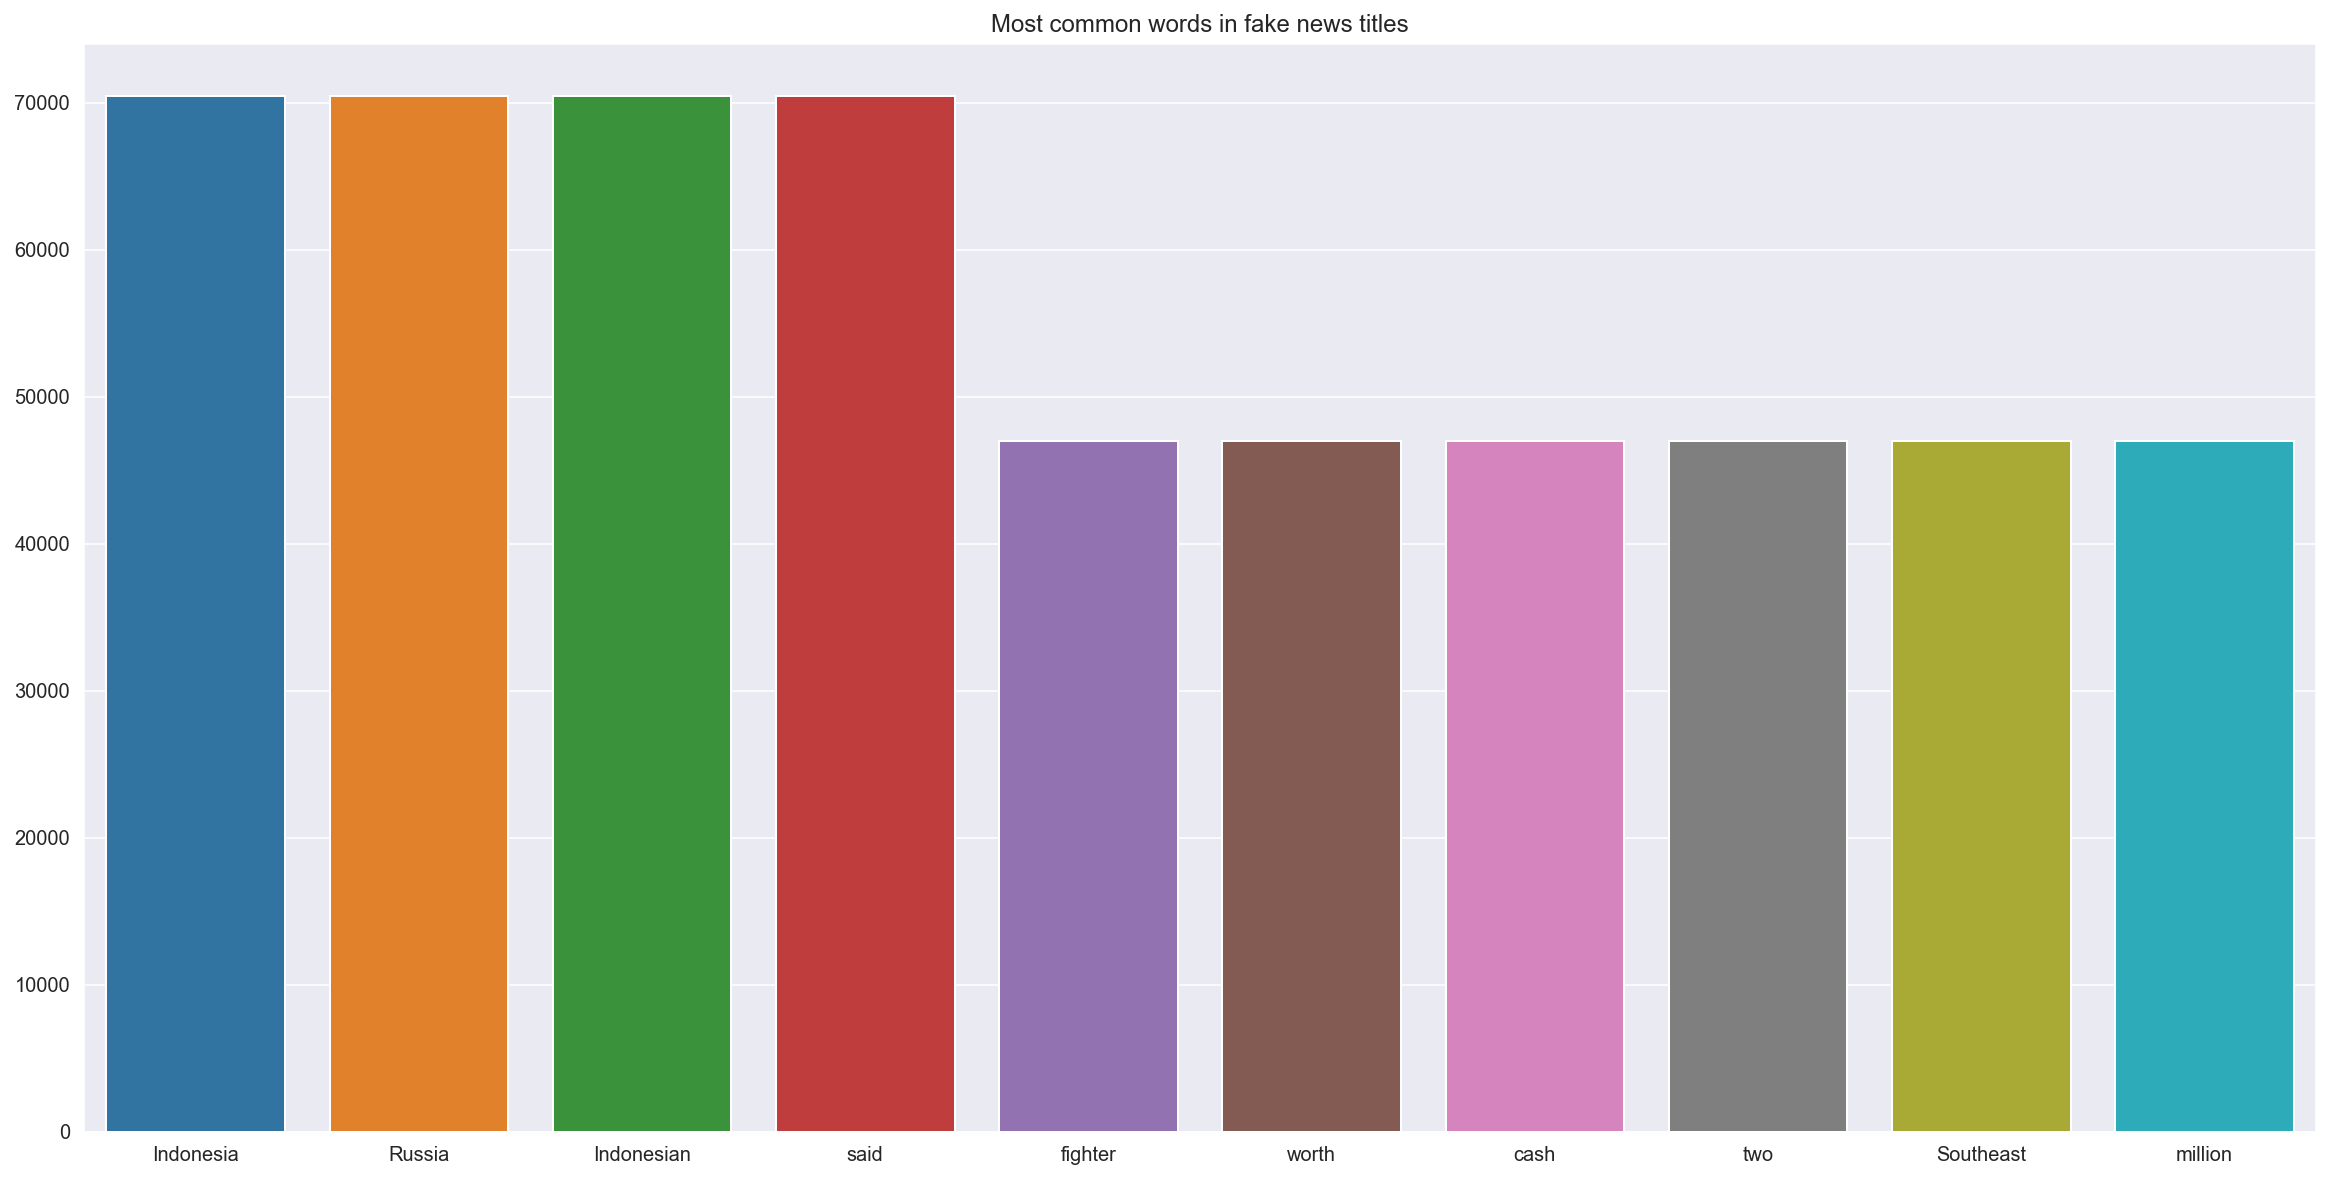

In [151]:
most_common_fake_serie = pd.Series(most_common_fake.values(), index=most_common_fake.keys())

plt.figure(figsize=(30,10))
plt.title('Most common words in fake news titles')
sns.barplot(x=most_common_fake_serie.index, y=most_common_fake_serie)
plt.show()